Configurando o Ambiente

In [13]:
library(tidyverse)
library(car)
library(BSDA)
library(nonpar)
library(haven)
library(nortest)

In [7]:
#Dados para os testes paramétricos
Production_Farming <- read_dta("/content/Production_FarmingEquipment.dta")
CustomerServices <- read_dta("/content/CustomerServices_Store.dta")
CustomerServices$store <- as.factor(CustomerServices$store)

Ttest_two_ind <- read_dta("/content/T_test_Two_Independent_Samples.dta")
Ttest_two_ind$supplier <- as.factor(Ttest_two_ind$supplier)

Ttest_two_pair <- read_dta("/content/T_test_Two_Paired_Samples.dta")

Anova_oneway <- read_dta("/content/One_Way_ANOVA.dta")
Anova_oneway$supplier <- as.factor(Anova_oneway$supplier)

Anova_twoway <- read_dta("/content/Two_Way_ANOVA.dta")
Anova_twoway$companie <- as.factor(Anova_twoway$companie)
Anova_twoway$day_of_the_week <- as.factor(Anova_twoway$day_of_the_week)

In [8]:
#Dados para os testes não paramétricos
SignTest_one <- read_dta("/content/Sign_Test_One_Sample.dta")
SignTest_two <- read_dta("/content/Sign_Test_Two_Paired_Samples.dta")
McNemar <- read_dta("/content/McNemar_Test.dta")
Wilcoxon <- read_dta("/content/Wilcoxon_Test.dta")
ChiSquared <- read_dta("/content/Chi-Square_k_Independent_Samples.dta")
MannWhitney <- read_dta("/content/Mann-Whitney_Test.dta")
CochranQ <- read_dta("/content/Cochran_Q_Test.dta")
Friedman <- read_dta("/content/Friedman_Test.dta")
KruskallWallis <- read_dta("/content/Kruskal-Wallis_Test.dta")


#1. Variável Categórica e Contínua

##1.1 Normalidade Univariada dos Dados

Os testes de normalidade são testes de aderência, isto é, comparam a distribuição de frequências acumuladas de um conjunto de valores amostrais (valores observados) com uma distribuição teórica. O objetivo é testar se os valores amostrais são oriundos de uma população com suposta distribuição teórica ou esperada, neste caso a distribuição normal.

Na hipótese nula dos testes de normalidade, a amostra possui distribuição normal. Na hipótese alternativa, a amostra não possui distribuição normal.

*H0: a amostra provém de uma população com distribuição Normal*

*H1: a amostra não provém de uma população com distribuição Normal*

**Exemplo: Aplicação dos testes de Normalidade**

*A Tabela 7 .1 apresenta os dados de produção mensal de máquinas agrícolas de uma empresa nos últimos 36
meses.Verifique se os dados da Tabela 7.1 são provenientes de uma população com distribuição normal*

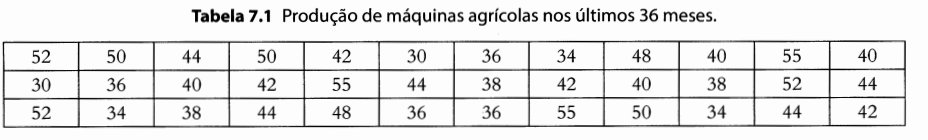

In [43]:
head(Production_Farming)

production
<dbl>
52
50
44
50
42
30


**Shapiro-Wilk**
O teste de Shapiro-Wilk pode ser **aplicado para amostras de tamanho 4<=n<=2000** , sendo uma alternativa ao teste de normalidade de Kolmogorov-Smirnov (K-S) no caso de pequenas amostras (n < 30). É o principal teste de normalidade.

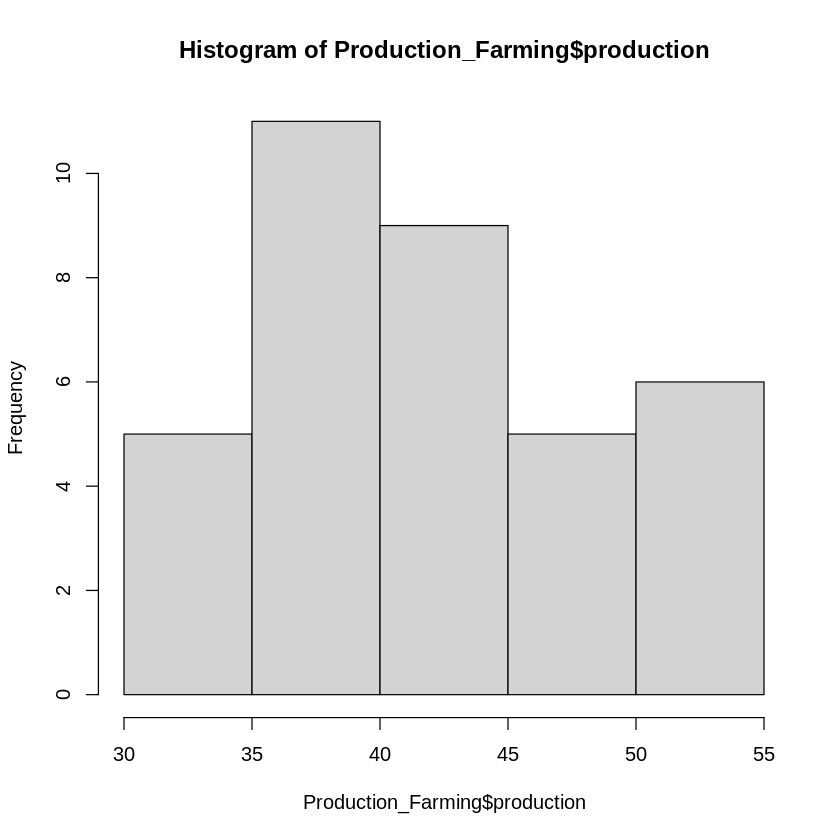

In [9]:
hist(Production_Farming$production)

In [10]:
shapiro.test(Production_Farming$production)


	Shapiro-Wilk normality test

data:  Production_Farming$production
W = 0.95651, p-value = 0.1674


**Kolmogorov-Smirnov**
Para utilização do teste de K-S, a média e o desvio-padrão da população devem ser conhecidos. **Para pequenas amostras, o teste perde potência, de modo que deve ser utilizado em amostras grandes (n>=30)**.

In [11]:
ks.test(Production_Farming$production, "pnorm", mean(Production_Farming$production),sd(Production_Farming$production))

Warning message in ks.test.default(Production_Farming$production, "pnorm", mean(Production_Farming$production), :
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Production_Farming$production
D = 0.11843, p-value = 0.6936
alternative hypothesis: two-sided


**Shapiro-Francia**
Os testes de Shapiro-Wilk e Shapiro-Francia têm a mesma forma, sendo diferentes apenas na definição dos coeficientes. O cálculo do teste de S-F é muito mais simples, podendo ser considerado uma versão simplificada do teste
de S-W, mas é tão robusto quanto. **O teste de Shapiro-Francia pode ser aplicado para amostras de tamanho 5<=n<=5.000, sendo similar ao teste
de Shapiro-Wilk para grandes amostras.**


In [14]:
sf.test(Production_Farming$production) #pacote nortest


	Shapiro-Francia normality test

data:  Production_Farming$production
W = 0.96745, p-value = 0.3053


##1.2 Homogeneidade de Variâncias

Uma das condições para se aplicar um teste paramétrico para comparação de k médias populacionais é que as
variâncias das populações, estimadas a partir de k amostras representativas, sejam homogêneas ou iguais.

Na hipótese nula dos testes de homogeneidade de variância, as variâncias das k populações são homogêneas.
Na hipótese alternativa, pelo menos uma variância populacional é diferente das demais.

*H0: todas as variâncias são iguais*

*H1: pelo menos uma das variâncias é diferente*

**Exemplo: Aplicação dos testes de Homogeneidade de Variâncias**

*Um supermercadista deseja estudar o número de clientes atendidos diariamente para tomar decisões estratégicas de operações.A Tabela 7.8 apresenta os dados de três lojas ao longo de duas semanas.Verifique se as variâncias
entre os grupos são homogêneas.*

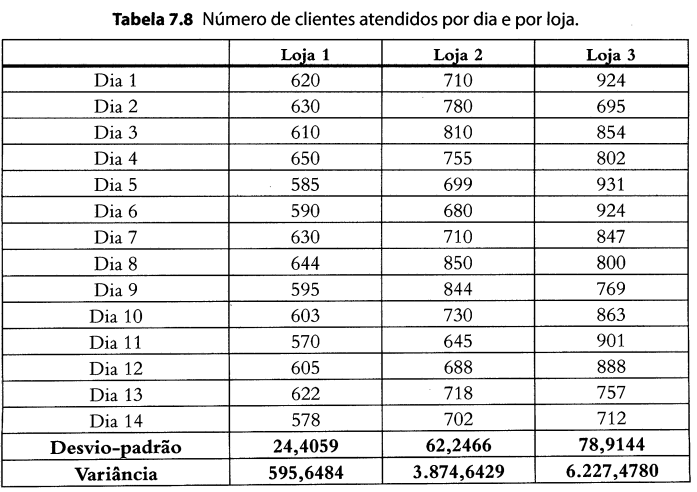

In [42]:
head(CustomerServices)

store,customer_services
<fct>,<dbl>
1,620
1,630
1,610
1,650
1,585
1,590


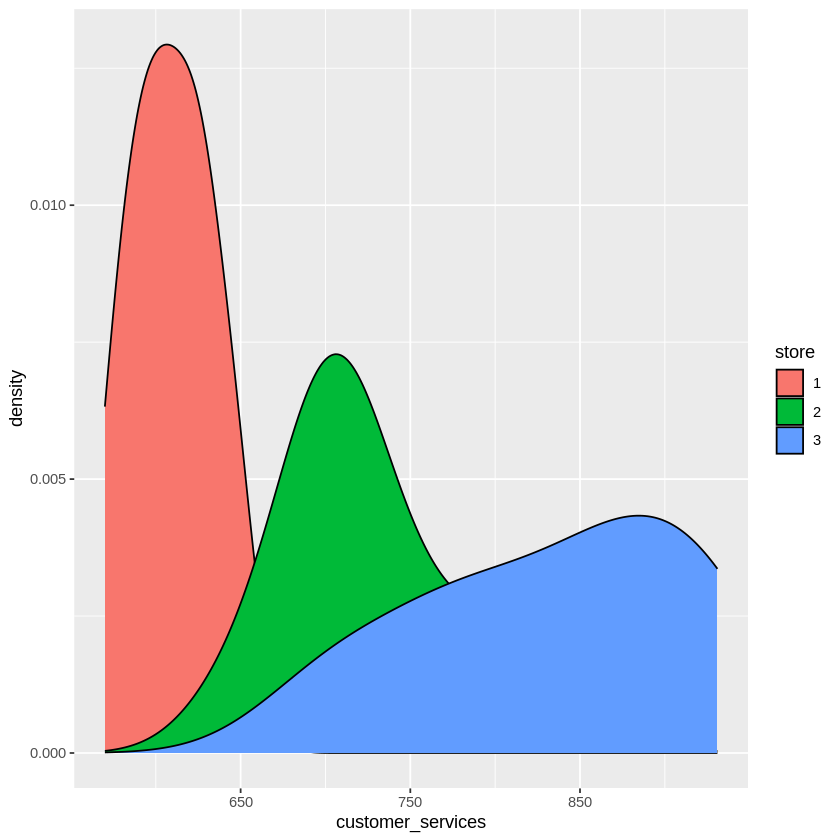

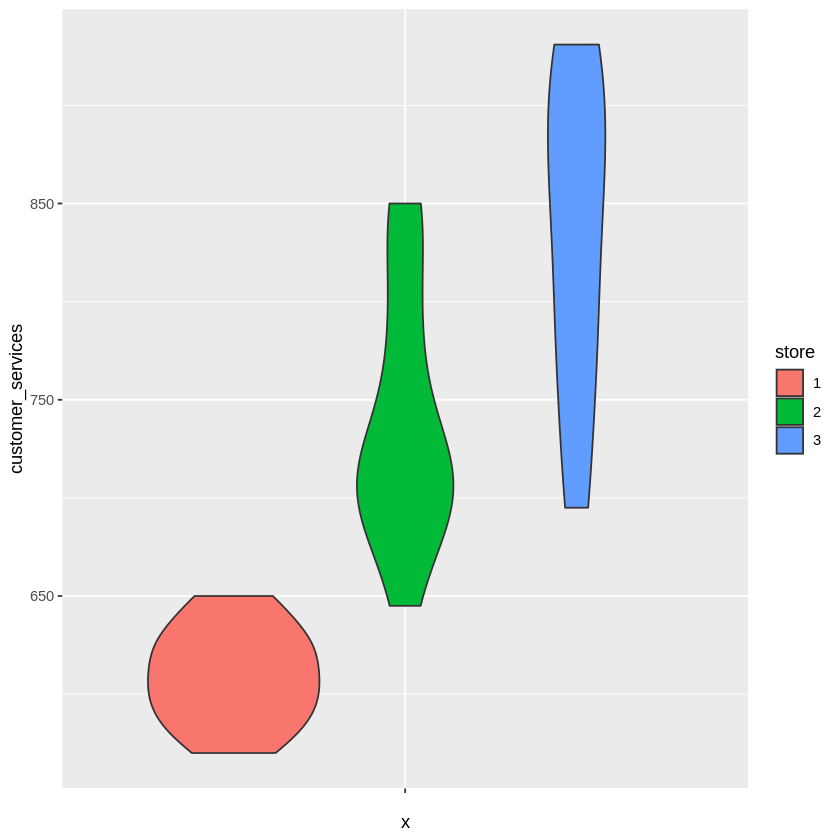

In [17]:
# Histograma
ggplot(CustomerServices) +
 aes(x = customer_services, fill = store) +
 geom_density(adjust = 1L) +
 scale_fill_hue(direction = 1) +
 theme_gray()

# Violin Plot
ggplot(CustomerServices) +
 aes(x = "", y = customer_services, fill = store) +
 geom_violin(adjust = 1L,
 scale = "area") +
 scale_fill_hue(direction = 1) +
 theme_gray()

**Bartlett**
O teste original proposto para verificar a homogeneidade de variâncias entre grupos é o teste de Bartlett. Esse teste é muito sensível aos desvios de normalidade, sendo o teste de Levene uma alternativa nesse caso.

In [15]:
bartlett.test(customer_services ~ store, data = CustomerServices)


	Bartlett test of homogeneity of variances

data:  customer_services by store
Bartlett's K-squared = 14.443, df = 2, p-value = 0.0007309


**Levene (F)**
A vantagem do teste F de Levene, em relação aos demais testes de homogeneidade de variâncias, é que ele é
menos sensível aos desvios de normalidade, além de ser considerado um teste mais robusto.

In [16]:
leveneTest(customer_services ~ store, data = CustomerServices)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,4.847959,0.01317209
,39,NA,NA


##1.3 Comparação de Médias/Medianas

**t de Student (comparação de médias de duas amostras independentes)**
O teste t para duas amostras independentes é aplicado para comparar as médias de duas amostras aleatórias extraídas da mesma população. Neste teste, a variância populacional é desconhecida.

Para um teste bilateral, na hipótese nula as médias populacionais são iguais; se as médias populacionais forem
diferentes, a hipótese nula é rejeitada, de modo que:

*H0: médias populacionais iguais*

*H1: médias populacionais diferentes*

**Exemplo: Aplicação do Teste T de Student para duas amostras independentes**

*Um engenheiro de qualidade desconfia que o tempo médio de fabricação de determinado produto plástico pode depender da matéria-prima utilizada que é proveniente de dois fornecedores. Uma amostra com 30 observações de cada fornecedor é coletada para teste e os resultados são apresentados nas Tabelas. Para o nível de significância a = 5%, verifique se há diferença entre as médias.*



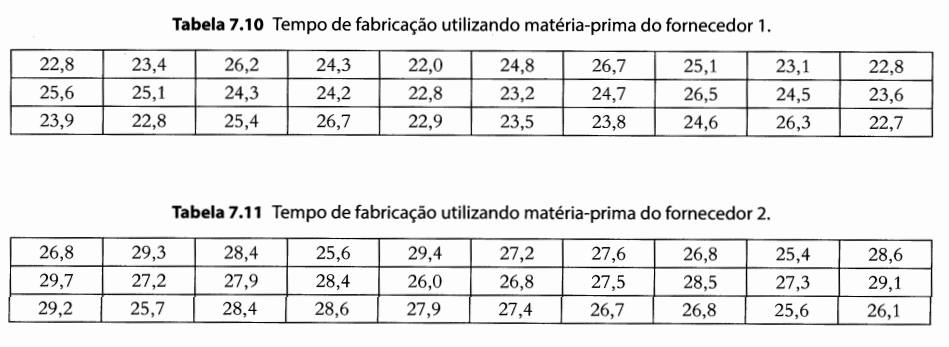

In [39]:
head(Ttest_two_ind)

supplier,time
<fct>,<dbl>
1,22.8
1,23.4
1,26.2
1,24.3
1,22.0
1,24.8


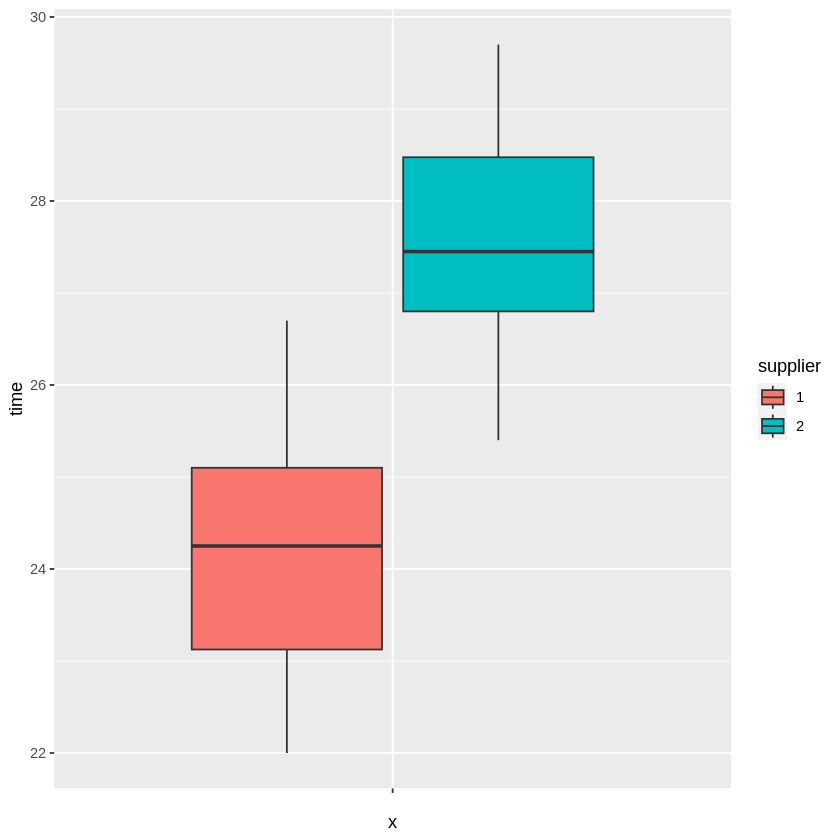

[1] "Teste de Normalidade"



	Shapiro-Wilk normality test

data:  Ttest_two_ind$time
W = 0.96384, p-value = 0.07261


[1] "Teste de Variância"


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1629822,0.6879102
,58,NA,NA


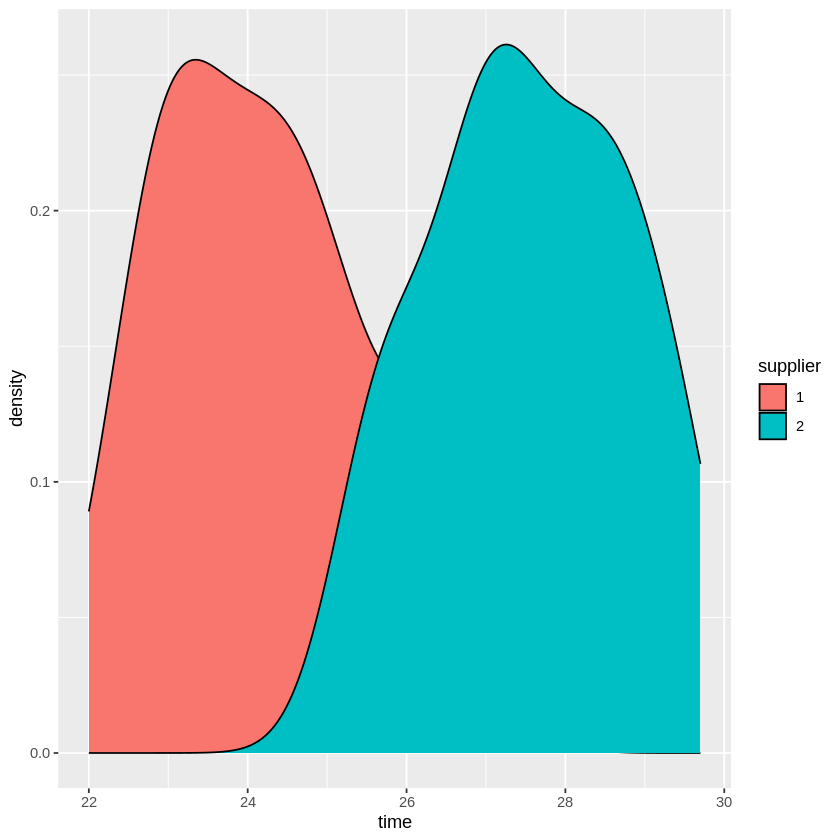

In [20]:
ggplot(Ttest_two_ind) +
 aes(x = "", y = time, fill = supplier) +
 geom_boxplot() +
 scale_fill_hue(direction = 1) +
 theme_gray()

ggplot(Ttest_two_ind) +
 aes(x = time, fill = supplier) +
 geom_density(adjust = 1L) +
 scale_fill_hue(direction = 1) +
 theme_gray()

# Verificando a normalidade e a homogeneidade = os dados respeitam ambas condicoes
print("Teste de Normalidade")
shapiro.test(Ttest_two_ind$time)

print("Teste de Variância")
leveneTest(time ~ supplier, data = Ttest_two_ind)

In [22]:
t.test(time ~ supplier, data = Ttest_two_ind, var.equal = TRUE)
# o Parâmetro var.equal pode ser alterado caso as variâncias sejam diferentes


	Two Sample t-test

data:  time by supplier
t = -9.7084, df = 58, p-value = 9.186e-14
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -3.924118 -2.582549
sample estimates:
mean in group 1 mean in group 2 
       24.27667        27.53000 


**Mann-Whitney**
O teste U de Mann-Whitney é um dos testes não paramétricos mais poderosos, aplicado para variáveis quantitativas ou qualitativas em escala ordinal, e tem como objetivo verificar se duas amostras não pareadas ou independentes são extraídas da mesma população. É uma alternativa ao teste t de Student quando a hipótese de normalidade for violada ou quando o tamanho da amostra for pequeno, podendo ser considerado a versão não paramétrica do teste t para duas amostras independentes.

Diferente do teste t, que verifica a igualdade das médias de duas populações independentes e com dados contínuos, o teste U de Mann-Whitney testa a igualdade das medianas. Para um teste bilateral, a hipótese nula é de
que a mediana das duas populações seja igual, isto é:

*H0: medianas das populações iguais*

*H1: medianas das populações diferentes*

**Exemplo: Aplicação do Teste de Mann-Whitney**

*Com o objetivo de avaliar a qualidade de duas máquinas, são comparados os diâmetros das peças produzidas
(em mm) em cada uma delas, como mostra a Tabela 8.15. Utilize o teste adequado, ao nível de significância de
5%, para testar se as duas amostras provêm ou não de populações com medianas iguais.*


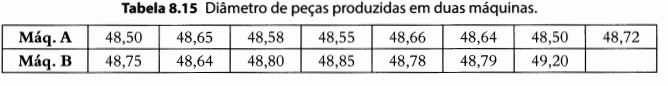

In [50]:
head(MannWhitney)

machine,diameter
<dbl+lbl>,<dbl>
2,48.50
2,48.50
2,48.55
2,48.58
2,48.64
1,48.64


In [23]:
wilcox.test(diameter ~ machine, data = MannWhitney, exact = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  diameter by machine
W = 52.5, p-value = 0.005395
alternative hypothesis: true location shift is not equal to 0


**t de Student (comparação de médias de duas amostras emparelhadas)**
Este teste é aplicado para verificar se as médias de duas amostras emparelhadas ou relacionadas, extraídas da mesma população (antes e depois) com distribuição normal, são ou não diferentes significativamente. Além da normalidade dos dados de cada amostra, o teste exige a homogeneidade das variâncias entre os grupos.

Ao contrário do teste t para duas amostras independentes, devemos calcular, inicialmente, a diferença entre cada par de valores na posição i e, a partir daí, testar a hipótese nula de que a média das diferenças na população é zero.

*H0: não há diferença nas médias*

*H1: há diferença nas médias*

**Exemplo: Aplicação do Teste T de Student para duas amostras emparelhadas**

*Um grupo de 10 operadores de máquinas, responsável por realizar determinada tarefa, é treinado para executar a mesma tarefa mais eficientemente. Para verificar se há redução no tempo de execução da tarefa, mede-se o
tempo gasto por cada operador, antes e depois do treinamento. Teste a hipótese de que as médias populacionais
das duas amostras emparelhadas são semelhantes, isto é, de que não há redução no tempo de execução da tarefa
após o treinamento.*

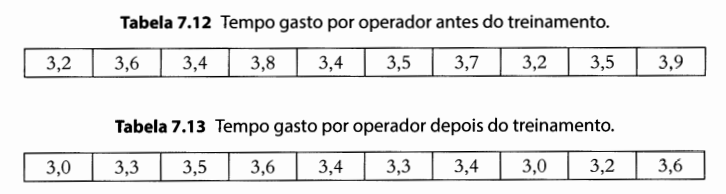

In [40]:
head(Ttest_two_pair)

before,after
<dbl>,<dbl>
3.2,3.0
3.6,3.3
3.4,3.5
3.8,3.6
3.4,3.4
3.5,3.3


In [24]:
t.test(Ttest_two_pair$before, Ttest_two_pair$after, paired = TRUE)


	Paired t-test

data:  Ttest_two_pair$before and Ttest_two_pair$after
t = 4.3846, df = 9, p-value = 0.001759
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.09197323 0.28802683
sample estimates:
mean difference 
           0.19 


**Wilcoxon** O teste T de Wilcoxon substitui o t de Student para amostras pareadas quando os dados não satisfazem
as exigências deste último.É um método não-paramétrico para comparação de duas amostras pareadas.

Consideremos d; a diferença entre os valores para cada par de dados. Inicialmente, vamos colocar em ordem crescente todos os d pelo seu valor absoluto (sem considerar o sinal) e calcular os respectivos postos usando essa
ordenação. Por exemplo, o posto 1 é atribuído ao menor, o posto 2 ao segundo menor e assim sucessivamente. Ao final, deve ser atribuído o sinal da diferença d para cada posto. É feita a soma dos postos positivos e negativos.

Devemos testar a hipótese de que não há diferenças entre as duas amostras (as amostras são provenientes de populações com a mesma mediana e a mesma distribuição contínua), isto é, a soma dos postos positivos é igual à soma dos postos negativos.


**Exemplo: Aplicação do Teste de Wilcoxon**

*Um grupo de 18 alunos do 3º ano do ensino médio é submetido a um exame de proficiência na língua inglesa, sem nunca ter feito um curso extracurricular. O mesmo grupo de alunos é submetido a um curso intensivo
de inglês por 6 meses e, ao final, fazem novamente o exame de proficiência. Os resultados são apresentados na
Tabela 8.9.Teste a hipótese de que não ocorrem melhoras antes e depois do curso.*

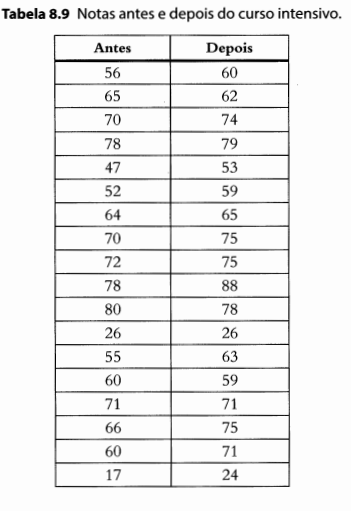

In [49]:
head(Wilcoxon)

before,after
<dbl>,<dbl>
56,60
65,62
70,74
78,79
47,53
52,59


In [25]:
wilcox.test(Wilcoxon$before, Wilcoxon$after, correct = FALSE, alternative = "two.sided", paired = TRUE)

Warning message in wilcox.test.default(Wilcoxon$before, Wilcoxon$after, correct = FALSE, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(Wilcoxon$before, Wilcoxon$after, correct = FALSE, :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test

data:  Wilcoxon$before and Wilcoxon$after
V = 11.5, p-value = 0.003445
alternative hypothesis: true location shift is not equal to 0


**ANOVA**

A Análise de Variância (ANOVA) é um teste utilizado para comparar médias de três ou mais populações, por
meio da análise de variâncias amostrais. O teste se baseia em uma amostra extraída de cada população, com o
intuito de determinar se as diferenças entre as médias amostrais sugerem diferenças significativas entre as médias
populacionais, ou se tais diferenças são decorrentes apenas da variabilidade implícita da amostra.
As suposições da ANOVA são:

1.   as amostras devem ser independentes entre si;
2.   os dados nas populações devem apresentar distribuição normal;
3. as variâncias populacionais devem ser homogêneas.

A ANOVA de um fator, conhecida em inglês como One-Way ANOVA, é a extensão do teste t de Student para duas médias populacionais, o que permite ao pesquisador a comparação de três ou mais médias populacionais.

A hipótese nula do teste afirma que as médias populacionais são iguais; se existir pelo menos um grupo com média diferente dos demais, a hipótese nula é rejeitada.

A ANOVA de um fator permite verificar o efeito de uma variável explicativa de natureza qualitativa (fator) em uma variável dependente de natureza quantitativa. Cada grupo inclui as observações da variável dependente em uma categoria do fator.

As hipóteses da técnica são testadas a partir do cálculo das variâncias dos grupos, daí o no~e ANOVA.A técnica envolve o cálculo das variações entre os grupos e dentro de cada grupo.

**Exemplo: Aplicação da Anova de um fator**

*Uma amostra de 32 produtos é coletada para analisar a qualidade do mel de três fornecedores. Uma das medidas de qualidade do mel é a porcentagem de sacarose, que normalmente varia de 0,25 a 6,5%.A Tabela 7.15
apresenta a porcentagem de sacarose para a amostra coletada de cada fornecedor.Verifique se há diferenças desse
indicador de qualidade entre os três fornecedores.*

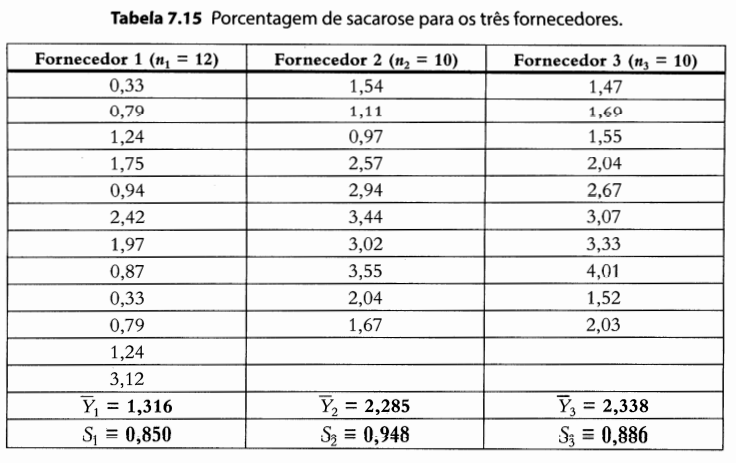

In [41]:
head(Anova_oneway)

supplier,sucrose
<fct>,<dbl>
1,0.33
1,0.79
1,1.24
1,1.75
1,0.94
1,2.42


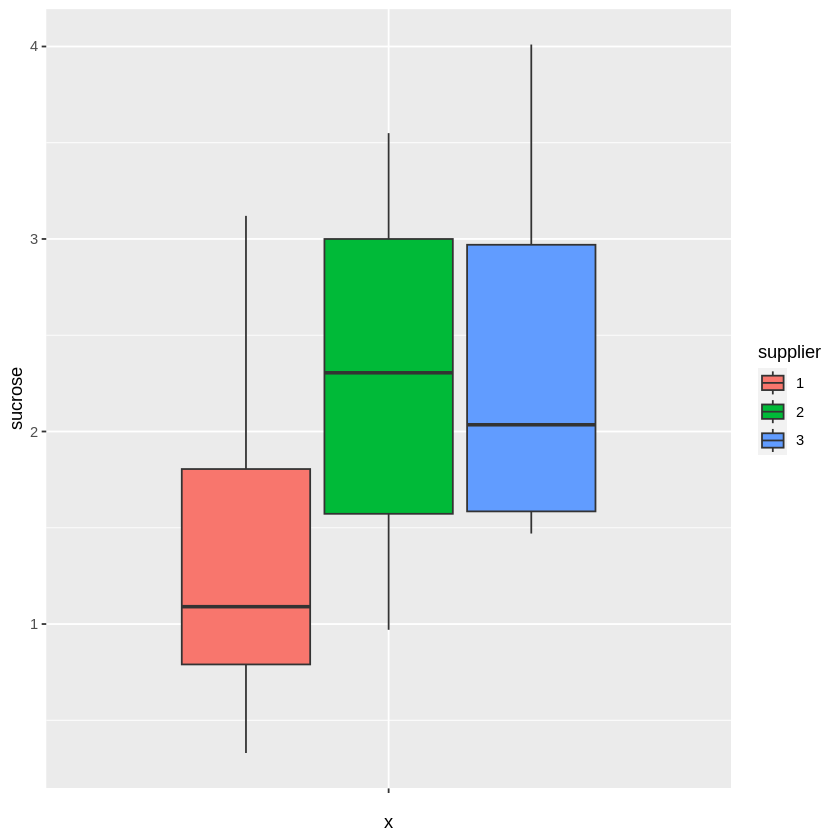

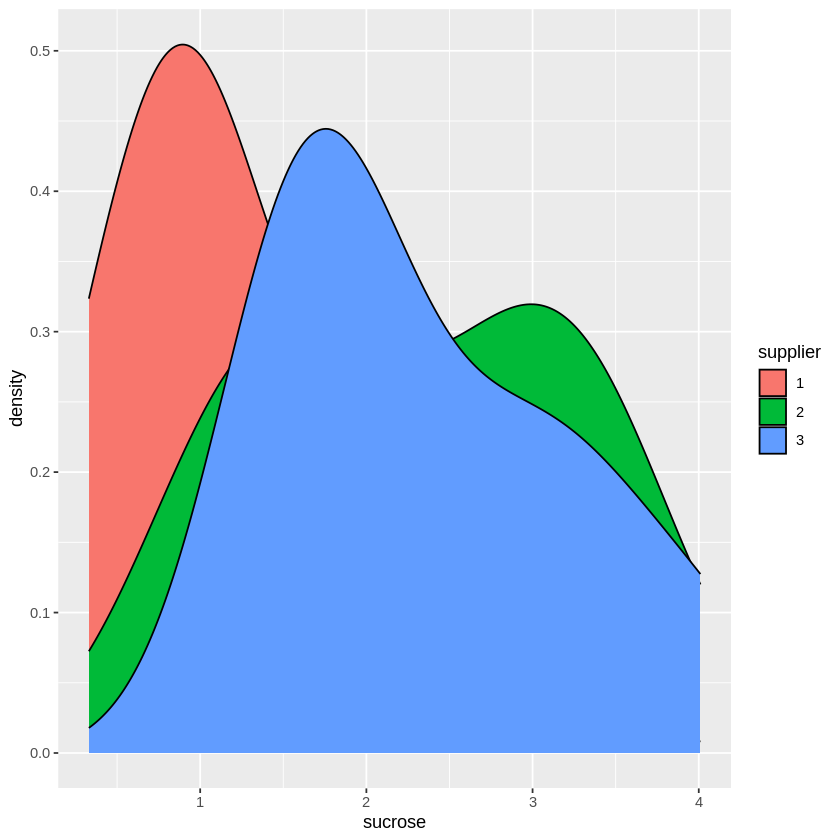

In [26]:
ggplot(Anova_oneway) +
 aes(x = "", y = sucrose, fill = supplier) +
 geom_boxplot() +
 scale_fill_hue(direction = 1) +
 theme_gray()

ggplot(Anova_oneway) +
 aes(x = sucrose, fill = supplier) +
 geom_density(adjust = 1L) +
 scale_fill_hue(direction = 1) +
 theme_gray()

In [27]:
# Criando a Anova
model <- aov(sucrose ~ supplier, data = Anova_oneway)
model
summary(model)

Call:
   aov(formula = sucrose ~ supplier, data = Anova_oneway)

Terms:
                 supplier Residuals
Sum of Squares   7.449186 23.099502
Deg. of Freedom         2        29

Residual standard error: 0.8924878
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value Pr(>F)  
supplier     2  7.449   3.725   4.676 0.0174 *
Residuals   29 23.100   0.797                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.318198,0.7299663
,29,NA,NA


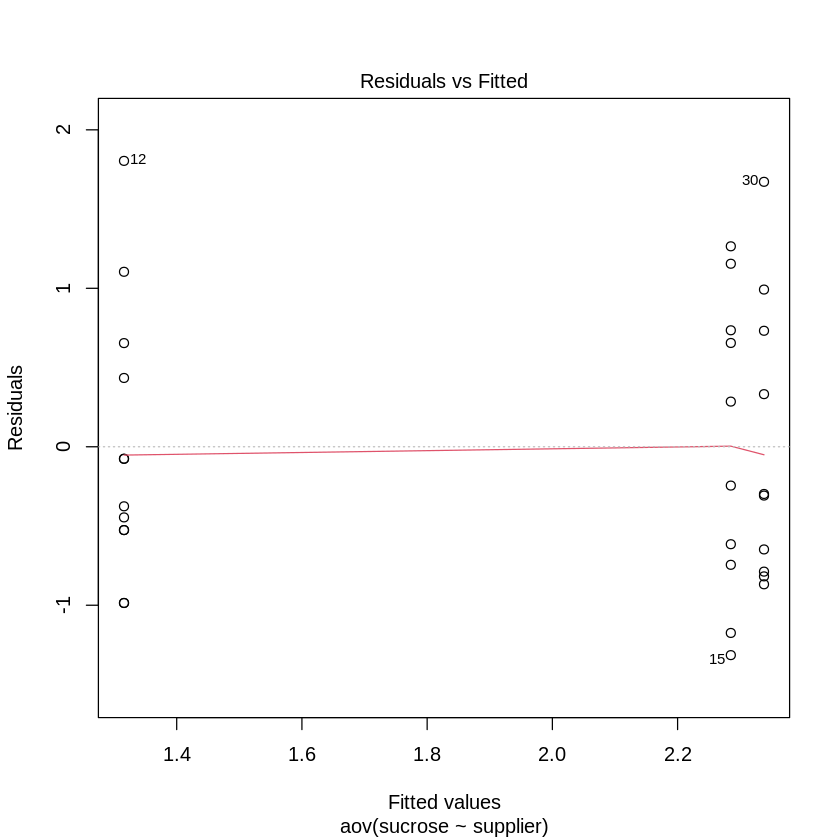


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.94518, p-value = 0.1051


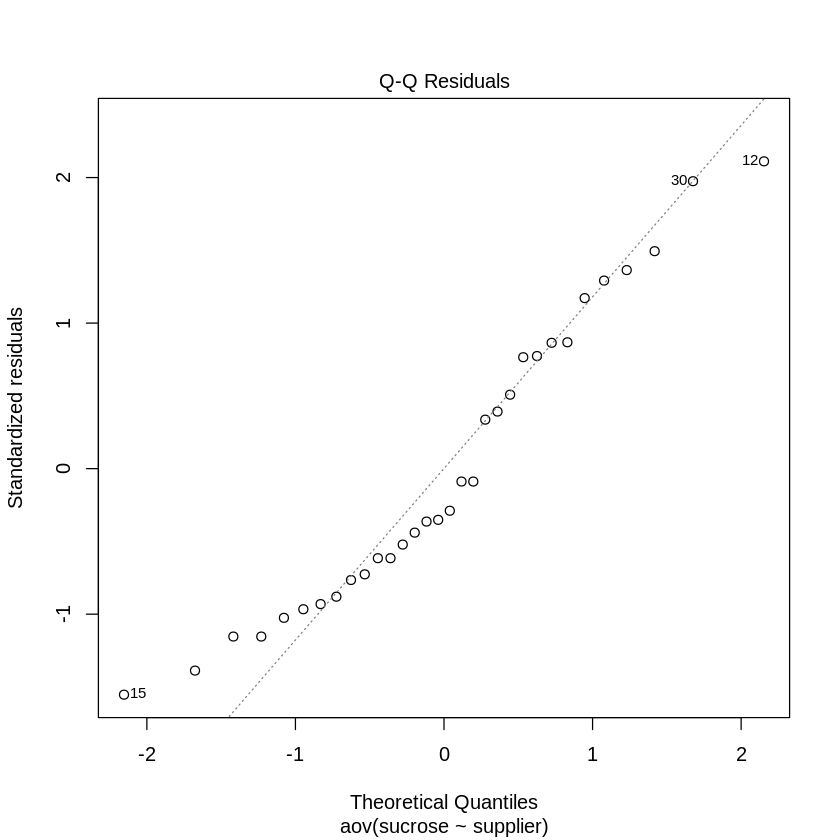

In [28]:
#Testando as premissas
plot(model, 1)
leveneTest(sucrose ~ supplier, data = Anova_oneway)
plot(model,2)
shapiro.test(resid(model))

In [29]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sucrose ~ supplier, data = Anova_oneway)

$supplier
          diff         lwr      upr     p adj
2-1 0.96916665  0.02541443 1.912919 0.0432173
3-1 1.02216667  0.07841445 1.965919 0.0316588
3-2 0.05300002 -0.93271703 1.038717 0.9903293


**Two-Way ANOVA**
A ANOVA fatorial é uma extensão da ANOVA de um fator, assumindo os mesmos pressupostos, porém considerando dois ou mais fatores. A ANOVA fatorial presume que a variável dependente de natureza quantitativa seja influenciada por mais de uma variável explicativa de natureza qualitativa (fator). Ela também testa as possíveis interações entre os fatores, por meio do efeito resultante da combinação do nível í do fator A com o nível j do fator B.

O objetivo da ANOVA fatorial é determinar se as médias
para cada nível do fator são iguais (efeito isolado dos fatores na variável dependente) e verificar a interação entre os fatores (efeito conjunto dos fatores na variável dependente).


Call:
   aov(formula = time ~ companie + day_of_the_week, data = Anova_twoway)

Terms:
                 companie day_of_the_week Residuals
Sum of Squares   177.8135       1286.0383  280.1065
Deg. of Freedom         2               6        15

Residual standard error: 4.321316
Estimated effects may be unbalanced

                Df Sum Sq Mean Sq F value   Pr(>F)    
companie         2  177.8   88.91   4.761   0.0251 *  
day_of_the_week  6 1286.0  214.34  11.478 7.09e-05 ***
Residuals       15  280.1   18.67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = time ~ companie * day_of_the_week, data = Anova_twoway)

Terms:
                 companie day_of_the_week companie:day_of_the_week Residuals
Sum of Squares   177.8135       1286.0383                  37.1899  242.9167
Deg. of Freedom         2               6                        5        10

Residual standard error: 4.928658
7 out of 21 effects not estimable
Estimated effects may be unbalanced

                         Df Sum Sq Mean Sq F value Pr(>F)   
companie                  2  177.8   88.91   3.660 0.0642 . 
day_of_the_week           6 1286.0  214.34   8.824 0.0016 **
companie:day_of_the_week  5   37.2    7.44   0.306 0.8982   
Residuals                10  242.9   24.29                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ companie + day_of_the_week, data = Anova_twoway)

$companie
          diff        lwr          upr     p adj
2-1 -0.6527778  -6.106899  4.801343330 0.9483013
3-1 -6.3035714 -12.112796 -0.494346656 0.0327535
3-2 -5.6507937 -11.307404  0.005816926 0.0502530

$day_of_the_week
             diff         lwr       upr     p adj
2-1  9.289021e+00  -1.8702002 20.448243 0.1361749
3-1  8.724537e+00  -4.6132836 22.062358 0.3447270
4-1  8.724537e+00  -4.6132836 22.062358 0.3447270
5-1  1.628108e+01   5.6108281 26.951341 0.0017706
6-1  2.015886e+01   9.4886059 30.829119 0.0001971
7-1  1.433862e+00 -10.4958470 13.363572 0.9995234
3-2 -5.644841e-01 -13.2178518 12.088884 0.9999986
4-2 -5.644841e-01 -13.2178518 12.088884 0.9999986
5-2  6.992063e+00  -2.8091930 16.793320 0.2587259
6-2  1.086984e+01   1.0685848 20.671098 0.0251907
7-2 -7.855159e+00 -19.0143801  3.304063 0.2713150
4-3 -1.421085e-14 -14.61

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,13,0.7532744,0.6894372
,10,NA,NA


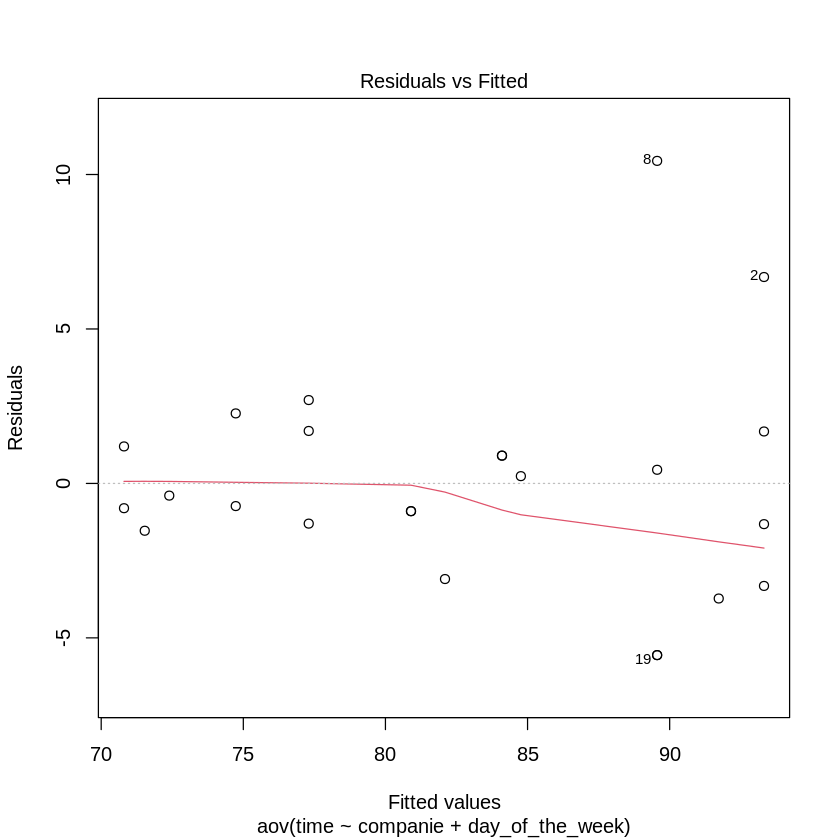


	Shapiro-Wilk normality test

data:  resid(model2)
W = 0.90912, p-value = 0.03375


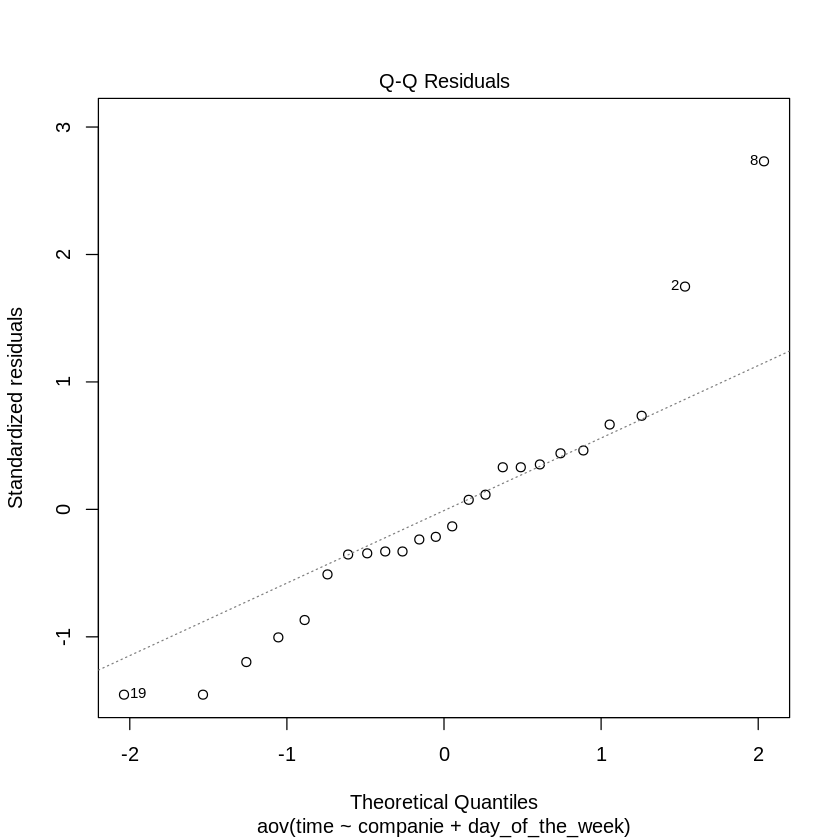

In [30]:
# Additive model (two factor variables are independent)
model2 <- aov(time ~ companie + day_of_the_week, data = Anova_twoway)
model2
summary(model2)

# Multiplicative model
model3 <- aov(time ~ companie * day_of_the_week, data = Anova_twoway)
model3
summary(model3)

# avaliando o modelo aditivo
TukeyHSD(model2)

#Testando as premissas
plot(model2, 1)
leveneTest(time ~ companie * day_of_the_week, data = Anova_twoway)
plot(model2,2)
shapiro.test(resid(model2))

**Kruskall-Wallis**
O teste de Kruskal-Wallis tem por objetivo verificar se k amostras independentes (k > 2) são provenientes da mesma população. É uma alternativa à Análise de Variância quando as hipóteses de normalidade dos dados e  igualdade das variâncias forem violadas, quando o tamanho da amostra for pequeno, ou ainda quando a variável for medida em escala ordinal.

A hipótese nula do teste de Kruskal-Wallis assume que as k amostras sejam provenientes da mesma população ou de populações idênticas com a mesma mediana (µ).

**Exemplo: Aplicação do teste de Kruskal-Wallis**

*Um grupo de 36 pacientes com mesmo nível de estresse é submetido a 3 diferentes tratamentos, isto é, 12 pacientes são submetidos ao tratamento A, outros 12 ao tratamento B e os 12 restantes ao tratamento C.Ao final do
tratamento, cada paciente é submetido a um questionário que avalia o nível de estresse, classificado em três fases:
fase de resistência para aqueles que apresentam até 3 pontos, fase de alerta a partir de 6 pontos e fase de exaustão
a partir de 8 pontos. Os resultados estão na Tabela 8.21.Verifique se os três tratamentos conduzem a resultados
iguais.*

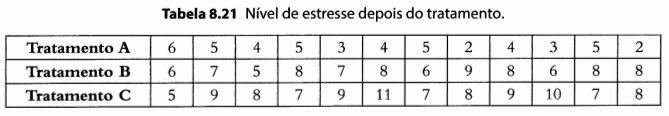

In [48]:
head(KruskallWallis)

treatment,result
<dbl>,<dbl>
1,6
1,5
1,4
1,5
1,3
1,4


In [31]:
kruskal.test(result ~ treatment, data = KruskallWallis)


	Kruskal-Wallis rank sum test

data:  result by treatment
Kruskal-Wallis chi-squared = 22.662, df = 2, p-value = 1.2e-05


**Friedman**
O teste de Friedman é aplicado para variáveis quantitativas ou qualitativas em escala ordinal e tem como objetivo verificar se k amostras emparelhadas são extraídas da mesma população. É uma extensão do teste de Wilcoxon para três ou mais amostras emparelhadas. É também uma alternativa à Análise de Variância
quando suas hipóteses (normalidade dos dados e homogeneidade das variâncias) forem violadas ou quando o tamanho da amostra for pequeno.

A hipótese nula do teste de Friedman assume, portanto, que as k amostras (colunas) sejam provenientes da mesma população ou de populações com a mesma mediana (µ).

**Exemplo: Aplicação do teste de Friedman**

*Uma pesquisa é realizada para verificar a eficácia do café da manhã na redução de peso e, para tal, 15 pacientes
são acompanhados durantes três meses. São coletados dados referentes ao peso dos pacientes durante três períodos
diferentes, conforme mostra a Tabela 8.18: antes do tratamento (AT), pós-tratamento (PT) e depois de três meses
de tratamento (D3M).Verifique se o tratamento oferece algum resultado.*

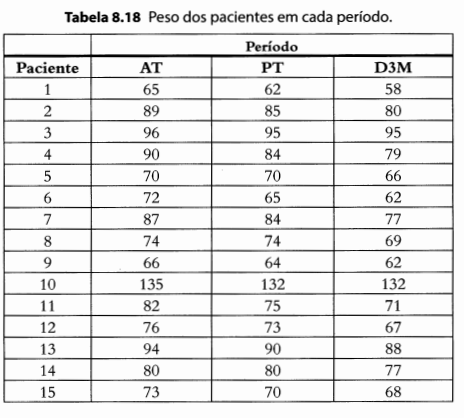

In [47]:
head(Friedman)

bt,at,a3m,N
<dbl>,<dbl>,<dbl>,<int>
65,62,58,1
89,85,80,2
96,95,95,3
90,84,79,4
70,70,66,5
72,65,62,6


In [34]:
#Ajustando os dados do exemplo
Friedman$N <- c(1:15)
Friedman_st <- pivot_longer(Friedman, cols = c(1,2,3), names_to = "Treatment", values_to = "Weight")


In [35]:
friedman.test(Friedman_st$Weight, groups = Friedman_st$Treatment, blocks = Friedman_st$N)


	Friedman rank sum test

data:  Friedman_st$Weight, Friedman_st$Treatment and Friedman_st$N
Friedman chi-squared = 27.527, df = 2, p-value = 1.053e-06


#2. Duas Variáveis Categóricas

##2.1 Associação

**McNemar (Amostras pareadas)**
O teste de McNemar é aplicado para testar a significância de mudanças em duas amostras relacionadas a partir de variáveis qualitativas ou categóricas que assumem apenas duas categorias (variáveis binárias). O objetivo
do teste é verificar se há mudanças significativas antes e depois da ocorrência de determinado evento. Para isto, utilizaremos uma tabela de contingência 2 X 2.

**Exemplo: Aplicação do teste de McNemar**

*Estava para ser votado no Senado o fim da aposentadoria integral para os servidores públicos federais. Com
o objetivo de verificar se essa medida traria alguma mudança na procura por concursos públicos, foi feita uma
entrevista com um grupo de 60 trabalhadores antes e depois da reforma, para que eles indicassem sua preferência em trabalhar em uma instituição particular ou pública. Os resultados estão na Tabela 8.7. Teste a hipótese de
que não houve mudança significativa nas respostas dos trabalhadores antes e depois da reforma previdenciária.*

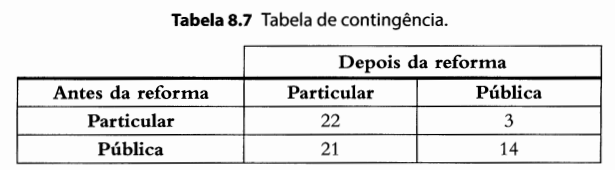

In [44]:
head(McNemar)

before,after
<dbl+lbl>,<dbl+lbl>
0,0
0,0
0,0
0,0
0,0
0,0


In [36]:
mcnemar.test(McNemar$before, McNemar$after)


	McNemar's Chi-squared test with continuity correction

data:  McNemar$before and McNemar$after
McNemar's chi-squared = 12.042, df = 1, p-value = 0.0005202


**Q de Chrochan (mais de 3 grupos de amostras pareadas)**
O teste Q de Cochran para k amostras emparelhadas é uma extensão do teste de McNemar para duas amostras, e tem por objetivo testar a hipótese de que as frequências ou proporções de três ou mais grupos relacionados são diferentes significativamente entre si. Da mesma forma que no teste de McNemar,os dados são de natureza binária.

**Exemplo: Aplicação do teste Q de Chrochan**

*Deseja-se avaliar o grau de satisfação de 20 consumidores em relação a três supermercados, com o intuito de
investigar se os clientes estão satisfeitos (score 1) ou não (score 0) em relação à qualidade, à diversidade e ao preço
dos produtos de cada supermercado.Verifique a hipótese de que a probabilidade de uma boa avaliação por parte
dos clientes é a mesma para os três supermercados.*

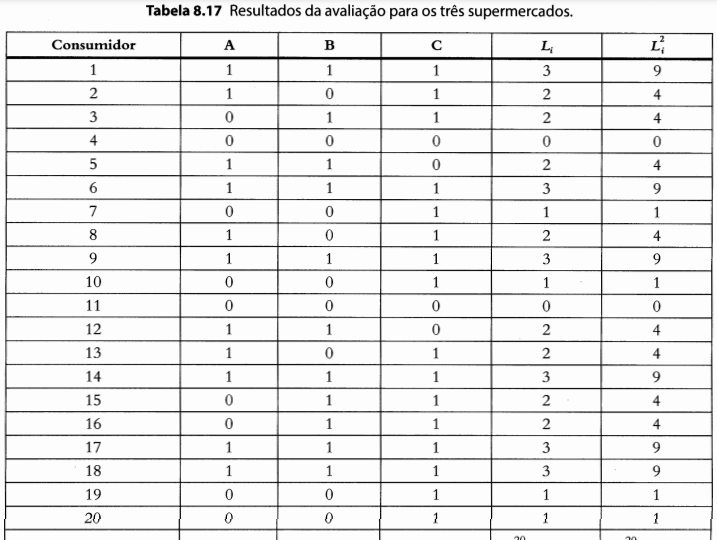

In [45]:
head(CochranQ)

a,b,c
<dbl+lbl>,<dbl+lbl>,<dbl+lbl>
1,1,1
1,0,1
0,1,1
0,0,0
1,1,0
1,1,1


In [37]:
CochranQ_st <- cbind(CochranQ$a, CochranQ$b, CochranQ$c)

cochrans.q(CochranQ)


 Cochran's Q Test 
 
 H0: There is no difference in the effectiveness of treatments. 
 HA: There is a difference in the effectiveness of treatments. 
 
 Q = 4.16666666666667 
 
 Degrees of Freedom = 2 
 
 Significance Level = 0.05 
 The p-value is  0.124514471444123 
  
 

**Qui-quadrado**
O teste compara as frequências observadas em cada uma das células da tabela de contingência com as frequências esperadas. O teste para duas amostras independentes assume as seguintes hipóteses:

*H0: não há diferença significativa entre as frequências observadas e esperadas*

*H1: há diferença significativa entre as frequências observadas e esperadas*

A estatística mede, portanto, a discrepância entre uma tabela de contingência observada e uma tabela de contingência esperada, partindo da hipótese de que não há associação entre as categorias das duas variáveis estudadas.

**Exemplo: Aplicação do teste Qui-quadrado**

*ma empresa quer avaliar se a produtividade dos funcionários depende ou não do turno de trabalho. Para isso, coleta dados de produtividade (baixa, média e alta) de todos os funcionários em cada turno.*

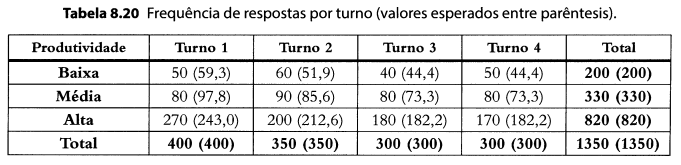

In [46]:
head(ChiSquared)

productivity,shift
<dbl+lbl>,<dbl+lbl>
1,1
1,1
1,1
1,1
1,1
1,1


In [38]:
chisq.test(ChiSquared$shift, ChiSquared$productivity)


	Pearson's Chi-squared test

data:  ChiSquared$shift and ChiSquared$productivity
X-squared = 13.143, df = 6, p-value = 0.04082


#3. Duas Variáveis Contínuas

**Coeficiente de Correlação de Pearson**
O coeficiente de correlação de Pearson (p) é uma medida que varia entre -1 e 1. Por meio do sinal, é possível verificar o tipo de relação linear entre as duas variáveis analisadas (direção em que a variável Y aumenta ou
diminui em função da variação de X); quanto mais próximo dos valores extremos, mais forte é a correlação entre elas.

O coeficiente de correlação de Pearson pode ser calculado como a razão entre a covariância de duas variáveis e o produto dos desvios-padrão de cada uma delas.

**Coeficiente de Correlação de Spearman**
O coeficiente de correlação de postos de Spearman, denominado pela letra
grega ρ (rho), é uma medida de correlação não-paramétrica. Ao contrário do
coeficiente de correlação de Pearson não requer a suposição que a relação
entre as variáveis é linear, nem requer que as variáveis sejam quantitativas;
pode ser usado para as variáveis medidas no nível ordinal.

**Coeficiente de Correlação de Kendall**
O coeficiente de correlação por postos de Kendall, τ (tau) é uma medida de
associação para variáveis ordinais. Uma vantagem de τ sobre o coeficiente de
Spearman é que τ pode ser generalizado para um coeficiente de correlação
parcial.

In [ ]:
cor(x, y, method = c("pearson", "kendall", "spearman"))
cor.test(x, y, method=c("pearson", "kendall", "spearman"))